In [102]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [81]:
#data import 

data_frame = pd.read_csv(join('data','abalone.csv'))
data_frame.head(5)

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


[129110.28838615]
-------------Linear Regression------------
RMSE: 2.2061754707957455
R2: 0.52261686265919


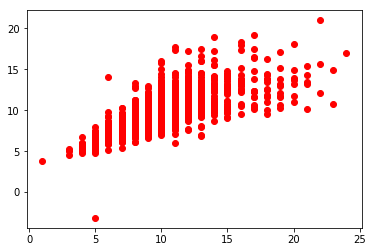

In [123]:
trn_x, tst_x, trn_y, tst_y = train_test_split(data_frame.iloc[:,1:8],data_frame.iloc[:,-1],test_size=0.3,random_state=123)

mod_lin = LinearRegression()
mod_lin.fit(X=trn_x, y=trn_y)
lr_pred_lin =  mod_lin.predict(X=tst_x)

np.sqrt(np.mean((np.square(lr_pred_lin-tst_y))))
plt.scatter(tst_y, lr_pred_lin, color='red')
lin_rm = np.sqrt(metrics.mean_squared_error(lr_pred_lin, tst_y))
lin_r2 = metrics.r2_score(tst_y, lr_pred_lin)

print(np.correlate(tst_y, lr_pred_lin))
print("-------------Linear Regression------------") 
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lin, tst_y)))
print('R2:',metrics.r2_score(tst_y, lr_pred_lin))


# mod_knn = KNeighborsRegressor(n_neighbors=5)
mod_knn.fit(X=trn_x, y=trn_y)
lr_pred_knn = mod_knn.predict(X=tst_x)
knn_rm = np.sqrt(metrics.mean_squared_error(lr_pred_knn, tst_y))
knn_r2 = metrics.r2_score(tst_y, lr_pred_knn)
plt.scatter(tst_y, lr_pred_knn, color='green')
print("-------------KNN Regression------------") 
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_knn, tst_y)))
print('R2:',metrics.r2_score(tst_y, lr_pred_knn))

-------------DT Regression------------
RMSE: 2.5252479502339704
R2: 0.37454650221248154


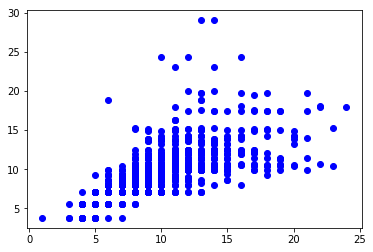

In [126]:
#------------------------------------------
mod_trr = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_split=3)
mod_trr.fit(X=trn_x, y=trn_y)
lr_pred_trr = mod_trr.predict(X=tst_x)
dt_rm = np.sqrt(metrics.mean_squared_error(lr_pred_trr, tst_y))
dt_r2 = metrics.r2_score(tst_y, lr_pred_trr)
plt.scatter(tst_y, lr_pred_trr, color='blue')
print("-------------DT Regression------------") 
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_trr, tst_y)))
print('R2:',metrics.r2_score(tst_y, lr_pred_trr))
#-- DT visualization
mod_trr.feature_importances_
export_graphviz(mod_trr, out_file='trr2.dot')




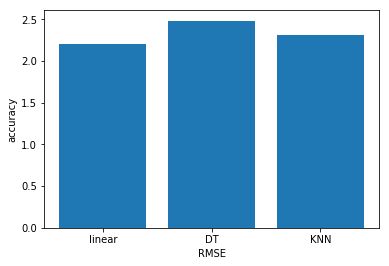

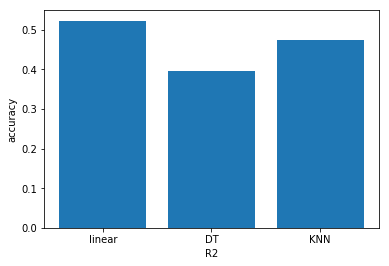

In [125]:
#-- performance visualization

cls = ('linear','DT','KNN')
y_value = np.arange(len(cls))
performance = [lin_rm,dt_rm,knn_rm]

plt.bar(y_value,performance,align='center')
plt.ylabel('accuracy')
plt.xlabel('RMSE')
plt.xticks(y_value,cls)
plt.show()

cls2 = ('linear','DT','KNN')

y_value = np.arange(len(cls2))
performance = [lin_r2,dt_r2,knn_r2]

plt.bar(y_value,performance,align='center')
plt.ylabel('accuracy')
plt.xlabel('R2')
plt.xticks(y_value,cls)
plt.show()